<a href="https://colab.research.google.com/github/PacJ/Python/blob/master/p603_%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%ED%95%A0(hold_out).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.  hold-out은 데이터셋을 Train, Test 셋으로 분리한다. 머신러닝 등 분석 방법에 따라서는  Train, Validation, Test 셋으로 분리하기도 한다.
 - Train Dataset: 모델을 학습시킬 때 사용할 데이터셋

 - Validation Dataset: Train Dataset으로 학습한 모델의 성능을 측정하기 위한 데이터셋 

 - Test Dataset: 모델의 성능을 최종적으로 측정하기 위한 데이터셋으로, 마지막에 모델의 성능을 측정하는 용도로 딱 한 번만 사용됨  

2. hold-out 데이터 분할은 scikit-learn의 train_test_split()함수를 사용한다.
  X_train, X_test, y_train, y_test = train_test_split(arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
  X :독립변수 데이터  
  Y : 종속변수 데이터  
  test_size : 테스트 셋 구성의 비율을 나타냅니다. train_size의 옵션과 반대 관계에 있는 옵션 값이며, 주로 test_size를 지정해 준다.  default 값은 0.25 이다.  
 random_state : 데이터셋을 섞을 때 해당 int 값을 보고 섞으며, 하이퍼 파라미터를 튜닝시 이 값을 고정해두고 튜닝해야 매번 데이터셋이 변경되는 것을 방지할 수 있다.
  shuffle : default=True 이며 보통은 default 값을 사용한다. split을 해주기 이전에 섞을건지 여부이다. 
  stratify : default=None으로 분류(classification)을 다룰때 매우 중요한 옵션값으로 층화임의추출 여부를 결정한다. stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation에 유지해 준다. (한 쪽에 쏠려서 분배되는 것을 방지한다.) 만약 이 옵션을 지정해 주지 않고 classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있다.

3. Hold out 방식의 단점 
- train/test 셋이 어떻게 나눠지냐에 따라 결과가 달라져서, 데이터가 수천건 정도로 적을 때는 문제가 발생할 수 있다.  

* 데이터셋의 양이 적을 경우 학습을 위한 데이터 양이 너무 적어 학습이 제대로 안 될 수 있으며, 다양한 패턴을 찾을 수 없기 때문에 

새로운 데이터에 대한 예측 성능이 떨어진다. 이에 Hold out 방식은 다양한 패턴을 가진 데이터의 양이 많을 경우에 사용한다. 

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [2]:
data = load_breast_cancer()

In [3]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
data_pd = pd.DataFrame(data.data, columns=data.feature_names)
data_pd.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data_target = pd.DataFrame(data.target, columns=['target'])
data_target.sample(5)

,target
316,1
66,1
484,1
240,1
279,1


In [7]:
breast_cancer = pd.concat([data_pd, data_target], axis = 1)
breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
breast_cancer.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,0
166,10.800,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,12.02,73.66,414.0,0.1436,0.1257,0.1047,0.04603,0.2090,0.07699,1
505,9.676,13.14,64.12,272.5,0.12550,0.22040,0.11880,0.07038,0.2057,0.09575,...,18.04,69.47,328.1,0.2006,0.3663,0.2913,0.10750,0.2848,0.13640,1
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,19.26,99.70,711.2,0.1440,0.1773,0.2390,0.12880,0.2977,0.07259,1
376,10.570,20.22,70.15,338.3,0.09073,0.16600,0.22800,0.05941,0.2188,0.08450,...,22.82,76.51,351.9,0.1143,0.3619,0.6030,0.14650,0.2597,0.12000,1


In [9]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
# column이 많을 때 DataFrame을 전치(T)하여 한번에 보면 좋다.
breast_cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:>

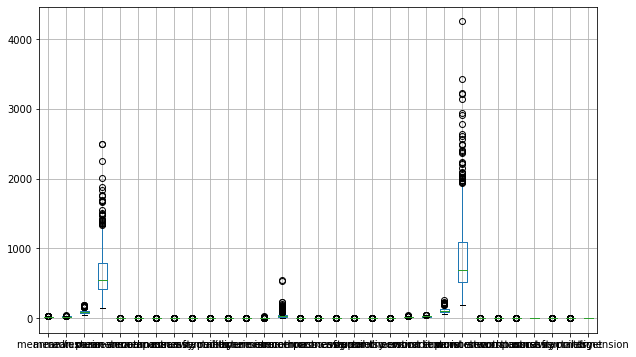

In [11]:
breast_cancer.boxplot(figsize=(10, 6))


### holdout : 학습/테스트 데이터 분리

In [12]:
# 중복 체크결과 중복 데이터는 없다.
breast_cancer[breast_cancer.duplicated()]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_test_split(breast_cancer)

[     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 420        11.57         19.04           74.20      409.7          0.08546   
 433        18.82         21.97          123.70     1110.0          0.10180   
 69         12.78         16.49           81.37      502.5          0.09831   
 31         11.84         18.70           77.93      440.6          0.11090   
 309        13.05         13.84           82.71      530.6          0.08352   
 ..           ...           ...             ...        ...              ...   
 185        10.08         15.11           63.76      317.5          0.09267   
 490        12.25         22.44           78.18      466.5          0.08192   
 285        12.58         18.40           79.83      489.0          0.08393   
 563        20.92         25.09          143.00     1347.0          0.10990   
 353        15.08         25.74           98.00      716.6          0.10240   
 
      mean compactness  mean concavity  mean conca

In [15]:
#output이 여러개인 경우 len을 해본다.
# train와 test값이 75대 25로 나눠준다.
len(train_test_split(breast_cancer))

2

In [16]:
# shuffle=True일 경우 매번 실행할 때마다 결과가 다르다
# 기본은 shuffle=True 이다.
X, y = train_test_split(breast_cancer, shuffle=False)

In [17]:
# random_state는 random seed를 지정한다.
# computer는 random seed를 기준으로 난수를 생성한다. (진정한 무작위는 불가능)
# random_state가 같으면 결과가 항상 같다.
X, y = train_test_split(breast_cancer, random_state=42)

In [18]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
287,12.890,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915,1
512,13.400,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090,0
402,12.960,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.01883,0.1874,0.05899,...,24.61,96.31,621.9,0.09329,0.23180,0.16040,0.06608,0.3207,0.07247,1
446,17.750,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,0.1713,0.05916,...,38.54,145.40,1437.0,0.14010,0.37620,0.63990,0.19700,0.2972,0.09075,0
210,20.580,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.09561,0.1765,0.05024,...,27.84,158.30,1656.0,0.11780,0.29200,0.38610,0.19200,0.2909,0.05865,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840,1
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097,1
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120,1
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550,0


In [19]:
#array를 1개 넣으면 값이 2개 반환
#array를 2개 넣으면  값이 4개 반환
len(train_test_split(breast_cancer.iloc[:,:-1], breast_cancer.target))

4

In [20]:
# DataFrame과 Series를 뽑아서 인자로 넣음
x, y, z, u = train_test_split(breast_cancer.iloc[:,:-1], breast_cancer.target)

In [21]:
# x는 학습데이터 쪼깬것 -train
x 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
28,15.300,25.27,102.40,732.4,0.10820,0.16970,0.168300,0.087510,0.1926,0.06540,...,20.270,36.71,149.30,1269.0,0.16410,0.61100,0.63350,0.20240,0.4027,0.09876
506,12.220,20.04,79.47,453.1,0.10960,0.11520,0.081750,0.021660,0.2124,0.06894,...,13.160,24.17,85.13,515.3,0.14020,0.23150,0.35350,0.08088,0.2709,0.08839
491,17.850,13.23,114.60,992.1,0.07838,0.06217,0.044450,0.041780,0.1220,0.05243,...,19.820,18.42,127.10,1210.0,0.09862,0.09976,0.10480,0.08341,0.1783,0.05871
516,18.310,20.58,120.80,1052.0,0.10680,0.12480,0.156900,0.094510,0.1860,0.05941,...,21.860,26.20,142.20,1493.0,0.14920,0.25360,0.37590,0.15100,0.3074,0.07863
476,14.200,20.53,92.41,618.4,0.08931,0.11080,0.050630,0.030580,0.1506,0.06009,...,16.450,27.26,112.10,828.5,0.11530,0.34290,0.25120,0.13390,0.2534,0.07858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,10.080,15.11,63.76,317.5,0.09267,0.04695,0.001597,0.002404,0.1703,0.06048,...,11.870,21.18,75.39,437.0,0.15210,0.10190,0.00692,0.01042,0.2933,0.07697
129,19.790,25.12,130.40,1192.0,0.10150,0.15890,0.254500,0.114900,0.2202,0.06113,...,22.630,33.58,148.70,1589.0,0.12750,0.38610,0.56730,0.17320,0.3305,0.08465
497,12.470,17.31,80.45,480.1,0.08928,0.07630,0.036090,0.023690,0.1526,0.06046,...,14.060,24.34,92.82,607.3,0.12760,0.25060,0.20280,0.10530,0.3035,0.07661
151,8.219,20.70,53.27,203.9,0.09405,0.13050,0.132100,0.021680,0.2222,0.08261,...,9.092,29.72,58.08,249.8,0.16300,0.43100,0.53810,0.07879,0.3322,0.14860


In [22]:
# y는 학습데이터 쪼갠것 - test
y

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
164,23.27,22.04,152.10,1686.0,0.08439,0.11450,0.13240,0.09702,0.1801,0.05553,...,28.01,28.22,184.20,2403.0,0.1228,0.3583,0.3948,0.23460,0.3589,0.09187
411,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.1067,0.07431,0.2998,0.07881
444,18.03,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,...,20.38,22.02,133.30,1292.0,0.1263,0.2666,0.4290,0.15350,0.2842,0.08225
223,15.75,20.25,102.60,761.3,0.10250,0.12040,0.11470,0.06462,0.1935,0.06303,...,19.56,30.29,125.90,1088.0,0.1552,0.4480,0.3976,0.14790,0.3993,0.10640
530,11.75,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,0.06677,...,13.50,27.98,88.52,552.3,0.1349,0.1854,0.1366,0.10100,0.2478,0.07757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,14.86,16.94,94.89,673.7,0.08924,0.07074,0.03346,0.02877,0.1573,0.05703,...,16.31,20.54,102.30,777.5,0.1218,0.1550,0.1220,0.07971,0.2525,0.06827
408,17.99,20.66,117.80,991.7,0.10360,0.13040,0.12010,0.08824,0.1992,0.06069,...,21.08,25.41,138.10,1349.0,0.1482,0.3735,0.3301,0.19740,0.3060,0.08503
36,14.25,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.05598,0.1885,0.06125,...,15.89,30.36,116.20,799.6,0.1446,0.4238,0.5186,0.14470,0.3591,0.10140
29,17.57,15.05,115.00,955.1,0.09847,0.11570,0.09875,0.07953,0.1739,0.06149,...,20.01,19.52,134.90,1227.0,0.1255,0.2812,0.2489,0.14560,0.2756,0.07919


In [23]:
# z는 정답데이터 쪼갠것 - train
z

28     0
506    1
491    1
516    0
476    1
      ..
185    1
129    0
497    1
151    1
3      0
Name: target, Length: 426, dtype: int64

In [24]:
#u는 정답데이터 쪼갠것 - test
u

164    0
411    1
444    0
223    0
530    1
      ..
434    1
408    0
36     0
29     0
236    0
Name: target, Length: 143, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.iloc[:,:-1], breast_cancer.target)

In [26]:
# 만약, train에는 정답이 없고 test에만 정답이 모두 들어가도록 쪼개지는 경우는 학습이 안되는 문제가 발생할 수 있다.
#random때문에 우연이 나뉘어질 수 도 있다.

# 예를 들어 0이 모두 train set에 포함되어 있고, test set에는 0이 없으면 0은 예측할 수 없을 것이다.
breast_cancer.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [27]:
# stratify는 데이터의 비율이 동일하게 나누는 옵션이다.
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.iloc[:,:-1], breast_cancer.target, stratify=breast_cancer.target)

In [28]:
# 적절하게 쪼개져는지 확인한다.
print(y_train.value_counts())

1    267
0    159
Name: target, dtype: int64


In [29]:
# 적절하게 쪼개져는지 확인한다.
print(y_test.value_counts())

1    90
0    53
Name: target, dtype: int64


### 기계학습

In [30]:
# LogisticRegression은 이름은 Regression이지만, 실제로는 분류 알고리즘이다.
# 알고리즘 내부적인 구현 때문에 일름이 Regression이 붙었다.
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression()

In [32]:
lr.fit(X_train, y_train)  #fit(학습데이터, 정답데이터)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
lr.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [34]:
# 맞췄는지 다음과 같이 비교할 수 있다.
lr.predict(X_test) == y_test

116     True
459     True
350     True
194    False
266     True
       ...  
516     True
455     True
471     True
263     True
340    False
Name: target, Length: 143, dtype: bool

In [35]:
# 정확도는 다음과 같이 구할 수 있다.
#sum(lr.predict(X_test) == y_test) / len(y_test)
lr.score(X_test, y_test)

0.8811188811188811

In [36]:
# 처음부터 다시 실행해보면 결과가 다르다.
# train_test_split이 random하게 학습데이터를 나누기 때문이다. 
# 같은 모델이어도 학습할 때마다 편차가 생긴다. 
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.iloc[:,:-1], 
                                                    breast_cancer.target, 
                                                    stratify=breast_cancer.target)
lr = LogisticRegression()
lr.fit(X_train, y_train)
sum(lr.predict(X_test) == y_test) / len(y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.965034965034965